# Video Games Preprocessing and Analysis

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from dateutil import parser
from pandas import Series
from math import ceil

In [3]:
# Load and Read Data
df = pd.read_csv('../Resources/finalClean_games.csv')
games_df = df
games_df

,Game Name,Franchise,Platform,Release Year,Years Since,First Release Year,Main Genre,Tier by Score,Critics,Critic_Score,Users,User Score,Developer,Global Sales,Other Info
0,#IDARB,#IDARB,Xbox,2015,0,2015,Action,Tier 3,31,77,88,6.9,OtherOceanInteractive,0.09,"Action,General"
1,007: Quantum of Solace,007: Quantum of Solace,PlayStation,2008,0,2008,Action,Tier 4,42,65,59,6.6,Treyarch,1.14,"Action,General,Shooter,Shooter,First-Person,Mo..."
2,007: Quantum of Solace,007: Quantum of Solace,PC,2008,0,2008,Action,Tier 3,18,70,64,6.1,"Treyarch,Beenox",0.03,"Action,General,Shooter,Shooter,First-Person,Mo..."
3,0RBITALIS,0RBITALIS,PC,2015,0,2015,General,Tier 3,9,73,4,7.3,AlanZucconi,NaN,"Miscellaneous,Puzzle,Action"
4,10 Second Ninja,10 Second Ninja,PC,2014,0,2014,Action,Tier 3,13,72,16,7.1,GameDesignDan,0.02,"Action,Platformer,2D"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,inFamous,inFamous,PlayStation,2009,0,2009,Action Adventure,Tier 2,98,85,1394,8.3,SuckerPunch,NaN,"Action Adventure,Modern,Sci-Fi,Sci-Fi,Open-World"
5493,inFamous 2,inFamous,PlayStation,2011,2,2009,Action Adventure,Tier 2,90,83,1190,8.6,SuckerPunch,NaN,"Action Adventure,Sci-Fi,Sci-Fi,Open-World"
5494,inFamous: Festival of Blood,inFamous,PlayStation,2011,2,2009,Action Adventure,Tier 3,32,78,163,8.0,SuckerPunch,NaN,"Action Adventure,Sci-Fi,Sci-Fi,Open-World"
5495,inFamous: Second Son,inFamous,PlayStation,2014,5,2009,Sci-Fi,Tier 2,90,80,3691,8.0,SuckerPunch,NaN,"Sci-Fi,Action Adventure,Sci-Fi,Open-World"


In [4]:
pd.set_option('display.max_rows', None)

In [5]:
games_df.describe()

,Release Year,Years Since,First Release Year,Critics,Critic_Score,Users,User Score,Global Sales
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,1287.000000
mean,2013.422048,4.055121,2009.366927,25.326542,79.054393,390.055667,7.187084,0.934584
std,5.629074,5.365470,6.755085,19.199400,6.044726,2227.400957,1.217430,1.668164
min,1995.000000,0.000000,1995.000000,0.000000,65.000000,0.000000,0.400000,0.010000
25%,2010.000000,0.000000,2003.000000,11.000000,75.000000,29.000000,6.700000,0.080000
50%,2015.000000,1.000000,2010.000000,19.000000,79.000000,78.000000,7.500000,0.370000
75%,2018.000000,7.000000,2015.000000,33.000000,83.000000,258.000000,8.000000,1.060000
max,2020.000000,24.000000,2020.000000,126.000000,98.000000,146262.000000,9.700000,21.040000


In [6]:
games_df.groupby('Franchise')['Game Name'].count().sort_values(ascending=False)

Franchise
LEGO                                             62
Resident Evil                                    58
The Walking Dead                                 57
Call of Duty                                     55
FIFA                                             53
The Sims                                         49
Tom Clancy                                       49
Assassin's Creed                                 46
Marvel                                           46
Final Fantasy                                    45
Life is Strange                                  42
Batman                                           39
Battlefield                                      38
Star Wars                                        37
Madden NFL                                       31
NHL                                              31
NBA                                              30
Fallout                                          30
The Elder Scrolls                                30
Wa

In [7]:
games_df.groupby('Franchise')['Global Sales'].count().sort_values(ascending=False)

Franchise
LEGO                                             34
Call of Duty                                     28
FIFA                                             26
The Sims                                         20
Assassin's Creed                                 20
Pro Evolution Soccer                             18
Tom Clancy                                       18
Madden NFL                                       18
Battlefield                                      16
F1                                               15
NHL                                              15
NBA                                              12
Batman                                           11
WWE                                              11
Far Cry                                          11
MLB                                              10
DiRT                                             10
NBA                                               9
Dragon Age                                        9
Ne

In [8]:
games_df.groupby('Franchise')['Critic_Score'].mean().sort_values(ascending=False)

Franchise
Grand Theft Auto                                 95.000000
Grim Fandango                                    94.000000
Portal                                           93.333333
Super Smash Bros.                                93.000000
The Last of Us                                   92.750000
The Orange Box                                   92.500000
Hades                                            92.500000
Undertale                                        92.333333
Team Fortress                                    92.000000
Journey                                          92.000000
The ICO & Shadow of the Colossus Collection      92.000000
Rome: Total War                                  92.000000
Red Dead Redemption                              91.500000
Braid                                            91.500000
Celeste                                          91.250000
Disco Elysium                                    91.000000
FreeSpace                                     

In [9]:
games_df.groupby('Platform')['Critic_Score'].mean()

Platform
PC             78.957308
PlayStation    79.141324
Switch         79.500852
Xbox           78.808847
Name: Critic_Score, dtype: float64

# Top Values in Dataset by Game Count

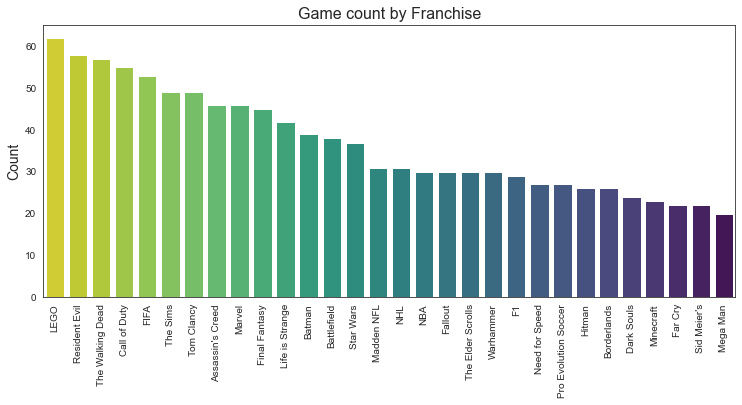

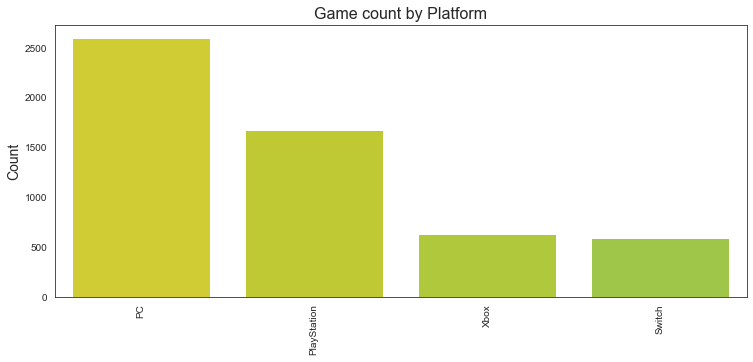

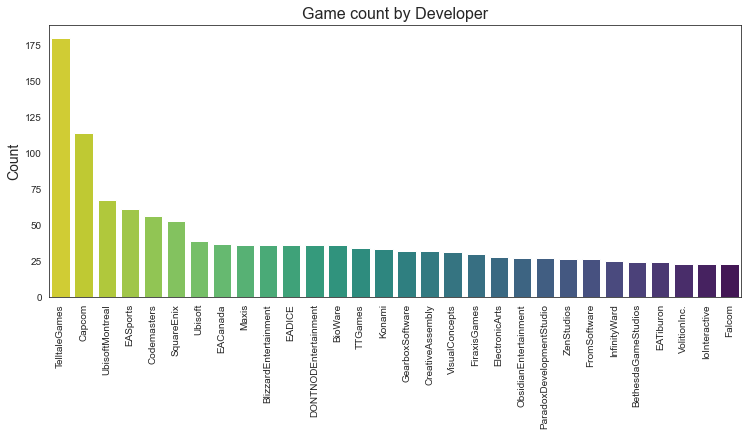

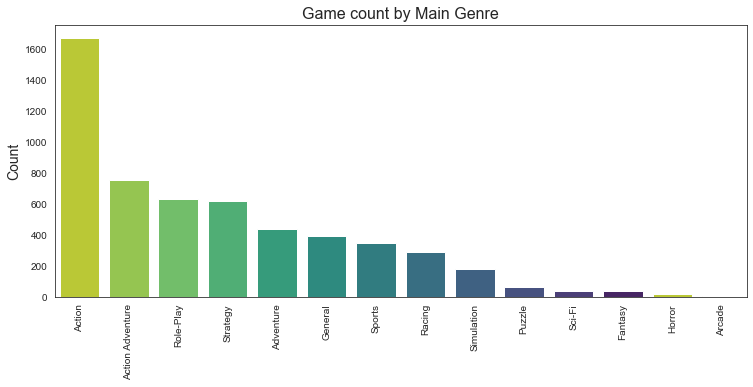

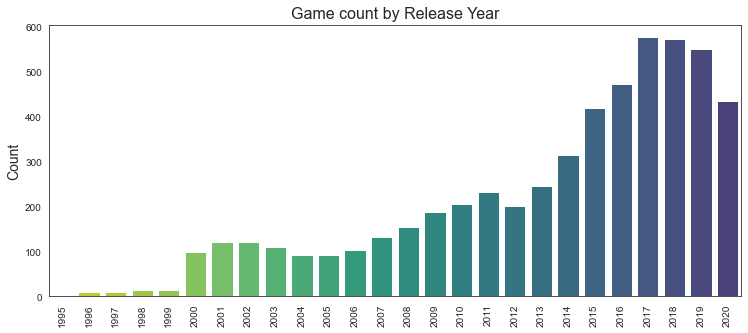

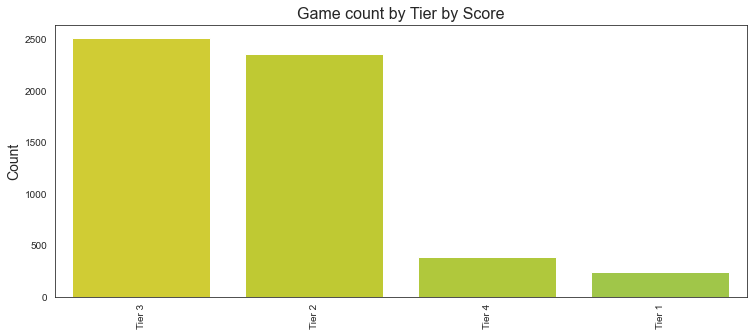

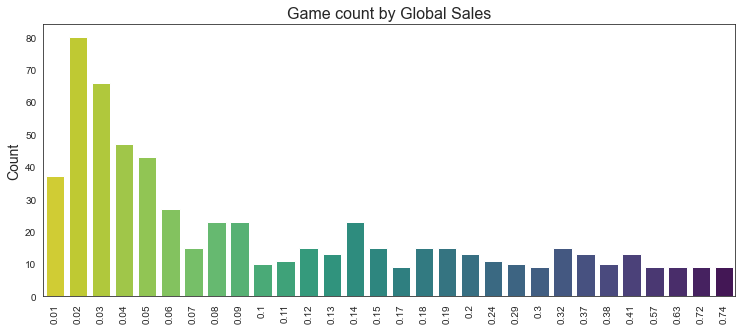

In [23]:
cols = ['Franchise','Platform', 'Developer', 'Main Genre', 'Release Year', 'Tier by Score','Global Sales'] 

for col in cols:
    chart = games_df[['Game Name', col]].groupby([col]).count().sort_values('Game Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Game Name', data=chart[:30], palette=sns.color_palette("viridis_r", (12 if col == 'Main Genre' else 30))).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

# Top Values by Global Sales

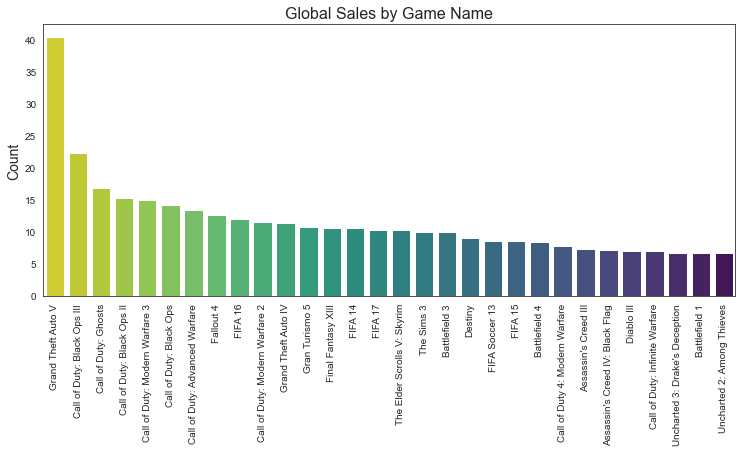

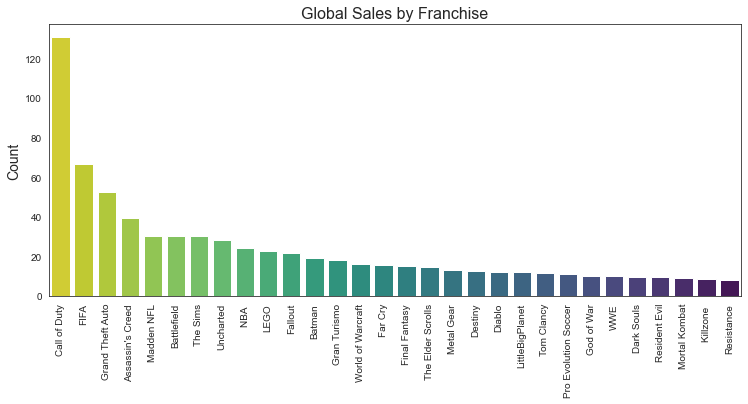

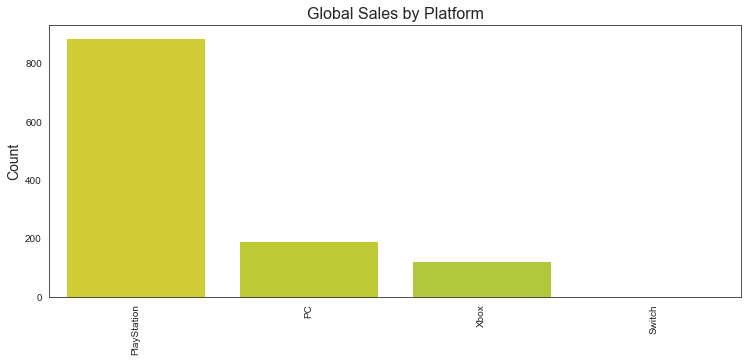

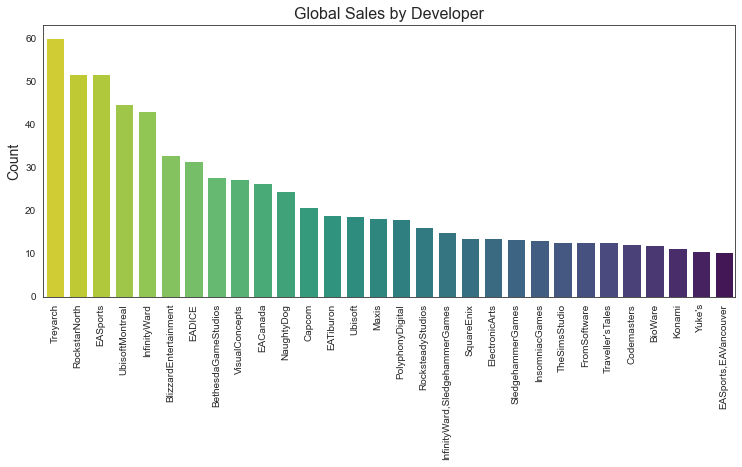

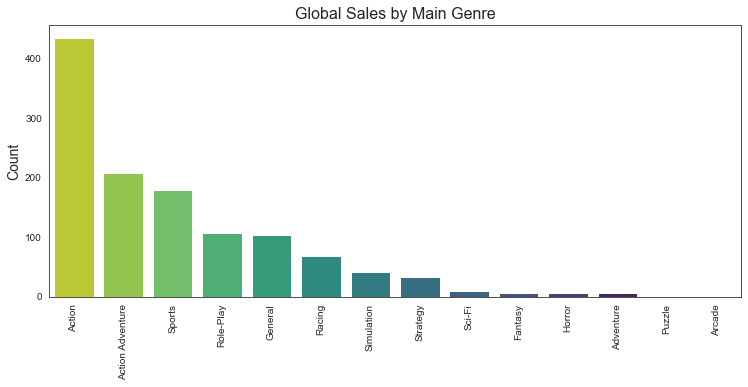

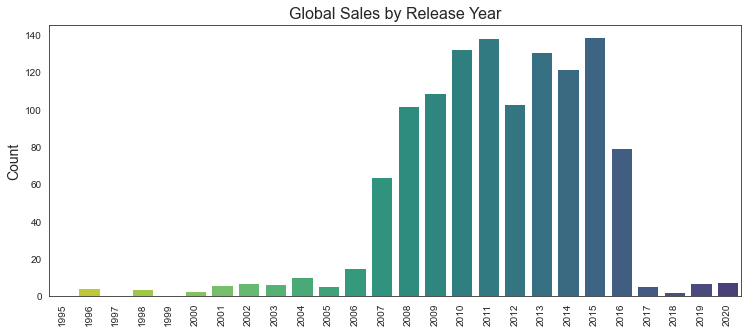

In [36]:
cols = ['Game Name','Franchise','Platform', 'Developer', 'Main Genre', 'Release Year'] 

for col in cols:
    chart = games_df[['Global Sales', col]].groupby([col]).sum().sort_values('Global Sales', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Global Sales', data=chart[:30], palette=sns.color_palette("viridis_r", (12 if col == 'Main Genre' else 30))).set_title(('Global Sales by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

# Top Values by Scores (Critic vs Metacritic)

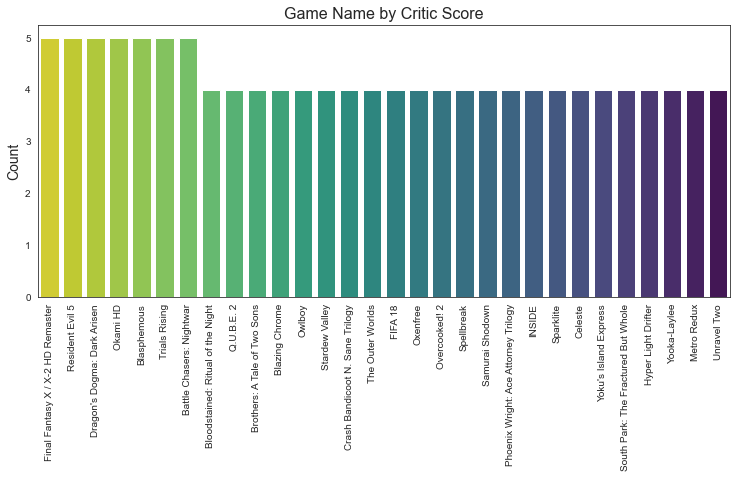

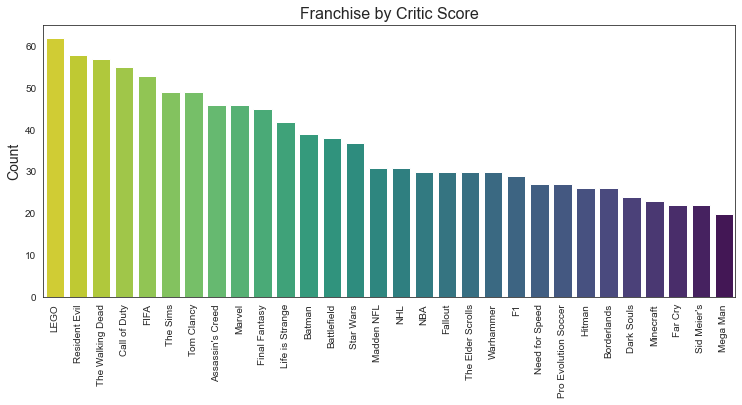

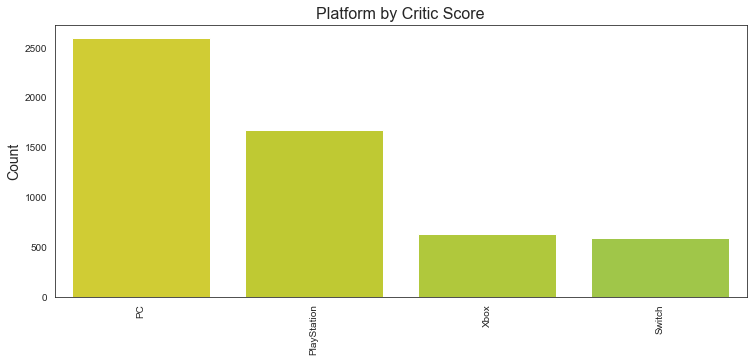

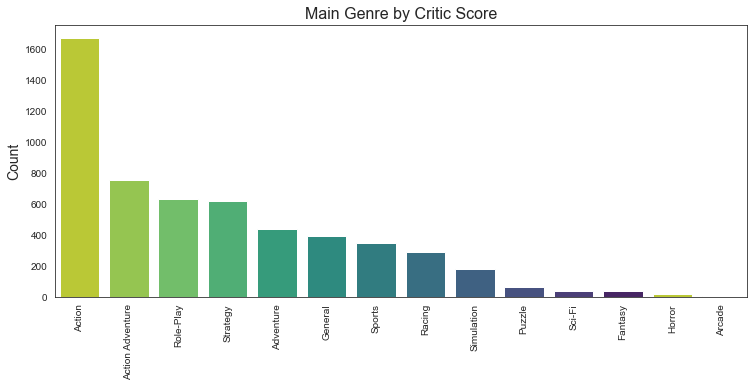

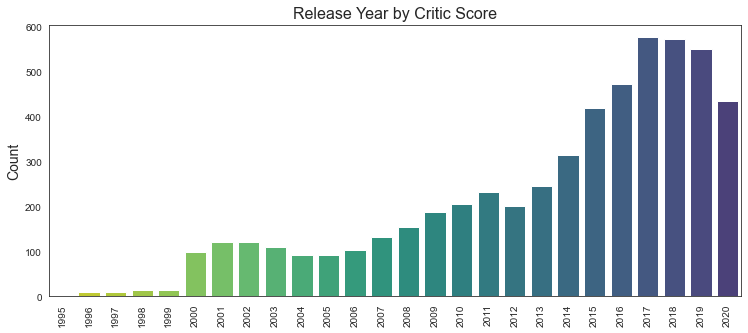

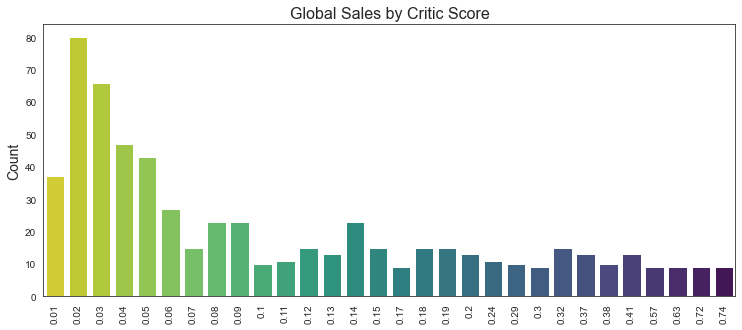

In [37]:
cols = ['Game Name','Franchise','Platform', 'Main Genre', 'Release Year','Global Sales'] 

for col in cols:
    chart = games_df[['Critic_Score', col]].groupby([col]).count().sort_values('Critic_Score', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Critic_Score', data=chart[:30], palette=sns.color_palette("viridis_r", (12 if col == 'Main Genre' else 30))).set_title((col+' by Critic Score'), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

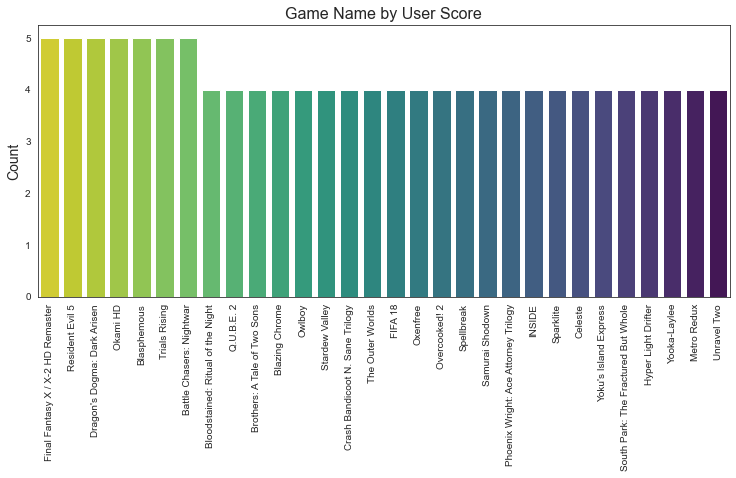

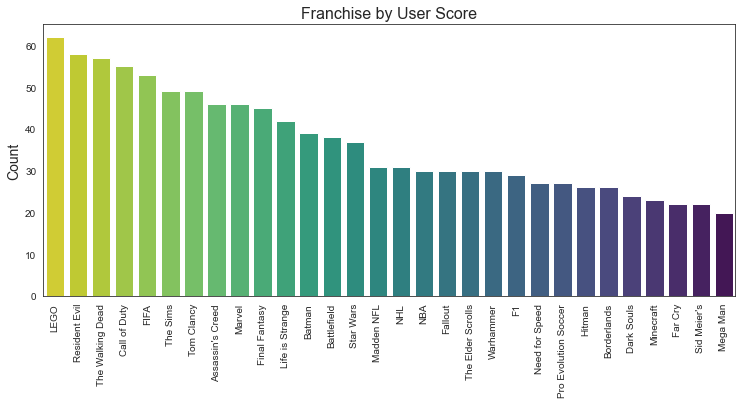

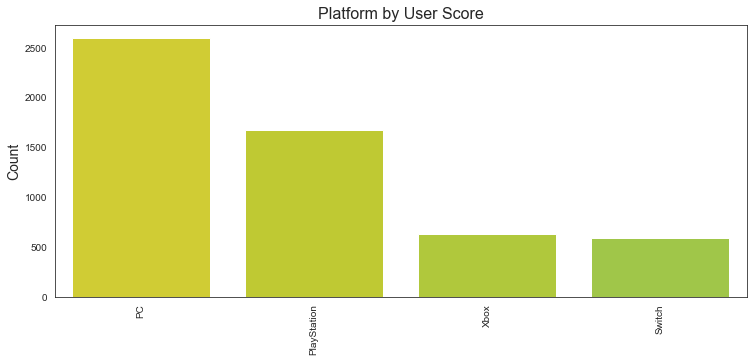

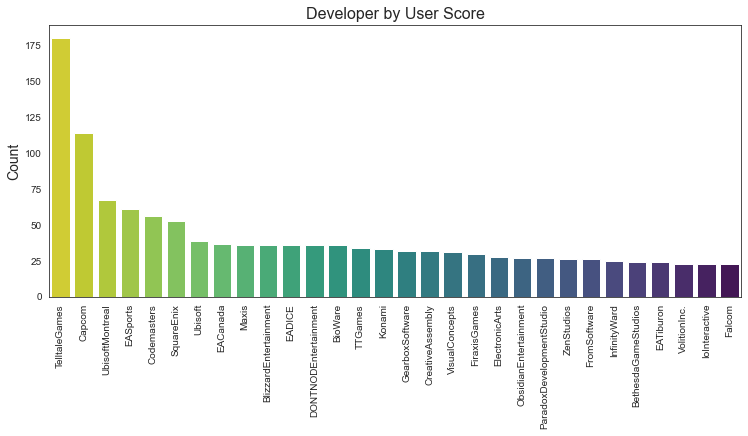

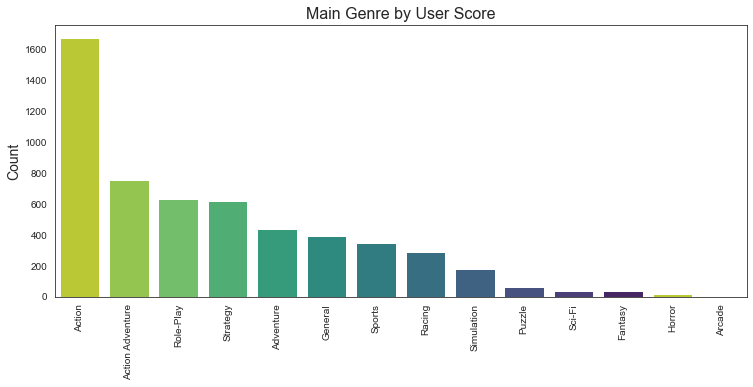

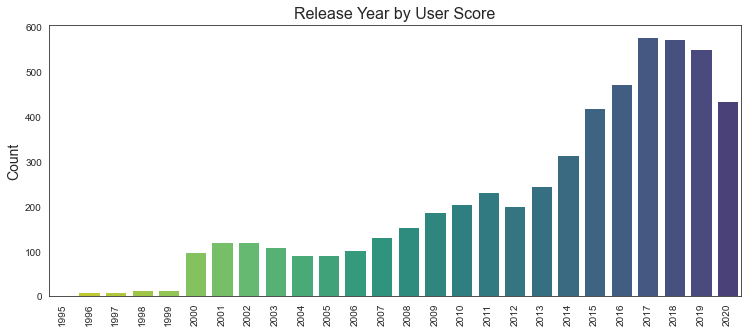

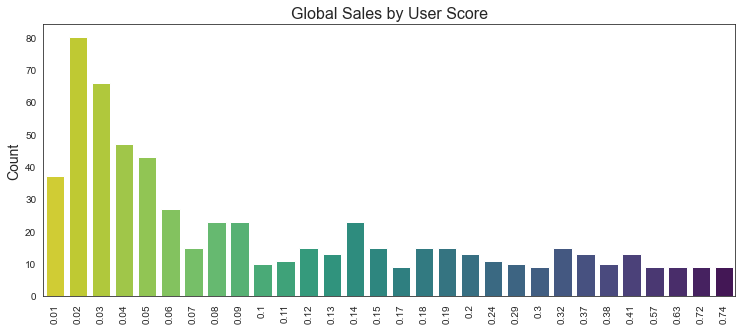

In [38]:
cols = ['Game Name','Franchise','Platform', 'Developer', 'Main Genre', 'Release Year','Global Sales'] 

for col in cols:
    chart = games_df[['User Score', col]].groupby([col]).count().sort_values('User Score', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='User Score', data=chart[:30], palette=sns.color_palette("viridis_r", (12 if col == 'Main Genre' else 30))).set_title((col+' by User Score'), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


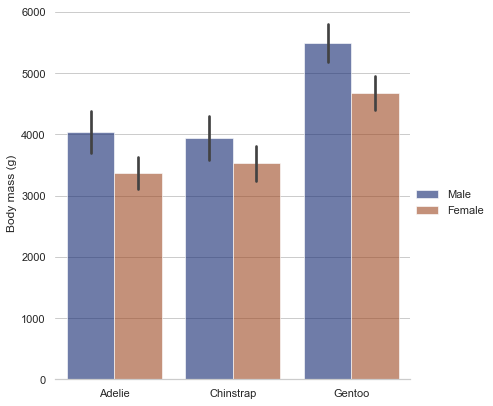

In [4]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

penguins

# Top Longest Franchises

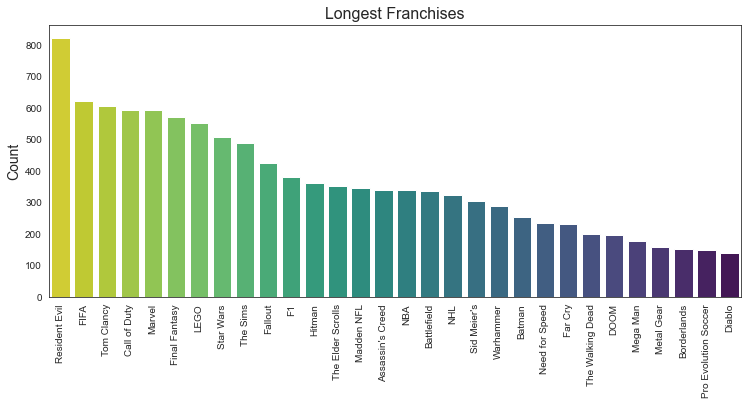

In [42]:
cols = ['Franchise'] 

for col in cols:
    chart = games_df[['Years Since', col]].groupby([col]).sum().sort_values('Years Since', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Years Since', data=chart[:30], palette=sns.color_palette("viridis_r", (12 if col == 'Main Genre' else 30))).set_title(('Longest Franchises'), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')
    plt.show()

# Top Fives!

In [10]:
# Top 5 Successful Video Games by Sales
games_df.groupby('Game Name')['Global Sales'].max().sort_values(ascending=False)[:5]

Game Name
Grand Theft Auto V                21.04
Call of Duty: Black Ops III       14.63
Call of Duty: Black Ops II        13.79
Call of Duty: Modern Warfare 3    13.32
Call of Duty: Black Ops           12.63
Name: Global Sales, dtype: float64

In [16]:
# Top 5 Longest Video Games
games_df.groupby('Game Name')['Years Since'].max().sort_values(ascending=False)[:5]

Game Name
Command & Conquer Remastered Collection    24
Star Wars Episode I: Racer                 23
Sid Meier's Civilization VI                23
Star Wars Jedi Knight: Jedi Academy        23
Age of Empires III: Definitive Edition     23
Name: Years Since, dtype: int64

In [11]:
# Top 5 Highly Reviewed Video Games by Scores(Critic and Metacritic)
games_df.groupby('Game Name')['Critic_Score'].max().sort_values(ascending=False)[:5]

Game Name
Grand Theft Auto IV                        98
Red Dead Redemption 2                      97
Super Mario Odyssey                        97
Grand Theft Auto V                         97
The Legend of Zelda: Breath of the Wild    97
Name: Critic_Score, dtype: int64

In [12]:
games_df.groupby('Game Name')['User Score'].max().sort_values(ascending=False)[:5]

Game Name
Rochard                     9.7
No More Heroes              9.6
Part Time UFO               9.6
Superliminal                9.6
The Witcher 3: Wild Hunt    9.4
Name: User Score, dtype: float64

In [13]:
# Top 5 Franchise by Sales vs Scores
games_df.groupby('Franchise')['Global Sales'].sum().sort_values(ascending=False)[:5]

Franchise
Call of Duty        130.54
FIFA                 66.53
Grand Theft Auto     52.70
Assassin's Creed     39.19
Madden NFL           30.49
Name: Global Sales, dtype: float64

In [14]:
# Top 5 Longest Franchise by Years Since
games_df.groupby('Franchise')['Years Since'].max().sort_values(ascending=False)[:5]

Franchise
Command & Conquer    24
Age of Empires       23
Fallout              23
Star Wars            23
Sid Meier's          23
Name: Years Since, dtype: int64

In [15]:
# Top 5 Most Successful Developers by Sales
games_df.groupby('Developer')['Global Sales'].count().sort_values(ascending=False)[:5]

Developer
Codemasters        33
UbisoftMontreal    31
EASports           26
EACanada           24
Capcom             22
Name: Global Sales, dtype: int64